# Information
$Writer: Junhyuck\ Woo$ <br>
$Std.ID: 20145337$<br>
$Assignment03: Visualization\ of\ Gradient\ Descent\ algorithm\ based\ on\ Linear\ Regression\ problem$<br>
$Deadline: Apr\ 11, 2020$
<hr>

# Library

In [0]:
import matplotlib.pyplot as plt; import numpy as np

Testing the data input

In [0]:
path="/content/drive/My Drive/Spring|2020/Machine_Learning/CAU-MachineLearning/Assignment03/data.csv"
data = np.genfromtxt(path, delimiter=',')

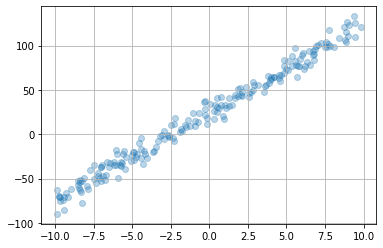

In [34]:
x_data = data[:, 0]
y_data = data[:, 1]

#Data
### Function
$m = 50$<br>
$y = \hat{y} + n, n\ is\ N(0,\sigma^2)$


In [0]:
m = x_data.size
x = np.arange(-15, 15, 0.1)
m_list = x_data
y = y_data

#Linear Model
$h_{\theta}(x) = {\theta}_0 + {\theta}_1x$<br>
${\theta}_0 = 0$<br>
${\theta}_1 = 1$

In [0]:
theta0 = 0; theta0_old = 0
theta1 = 1; theta1_old = 0
theta0_history = [theta0]
theta1_history = [theta1]
h = theta0 + theta1*m_list

# Objective Function
$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}{(h}_{\theta}(x^{(i)}){-}y^{(i)})^2$

In [0]:
j = np.sum((h - y)**2) / (2*m)
j_old = 0
j_history = [j]

# Gradient Descent
$\theta_0^{(t+1)} := {\theta}_{0}^{(t)} - {\alpha} \frac{1}{m}\sum_{i=1}^{m}{(h}_{\theta}(x^{(i)}){-}y^{(i)})$<br>
${\theta}_{1}^{(t+1)} := {\theta}_{1}^{(t)} - {\alpha} \frac{1}{m}\sum_{i=1}^{m}{(h}_{\theta}(x^{(i)}){-}y^{(i)})x^{(i)}$<br>
${\alpha} = 0.1$

In [0]:
alpha = 0.001

# Training Process

In [0]:
# Check the number of iteration
iteration = 1

while  (abs(j - j_old) + abs(theta0 - theta0_old) + abs(theta1 - theta1_old)) != 0:
    # Calculate the theta
    theta0_old = theta0
    theta1_old = theta1
    theta0 = theta0 - alpha*np.sum(h-y)/m
    theta1 = theta1 - alpha*np.sum((h-y)*m_list)/m

    # Update the j, h
    j_old = j
    h = theta0 + theta1*m_list
    j = np.sum((h - y)**2) / (2*m)

    # Record the history of parameter
    theta0_history.append(theta0)
    theta1_history.append(theta1)
    j_history.append(j)

    iteration = iteration +1

#Check the Convergence

In [41]:
# Iteration
print("# Iteration: " + str(iteration) + '\n')

# Theta 0
print("Updated Theta0: "+ str(theta0))
print("Old Theta0: " + str(theta0_old))
print("Diff: " + str(theta0 - theta0_old) + '\n')

# Theta 1
print("Updated Theta1: "+ str(theta1))
print("Old Theta1: " + str(theta1_old))
print("Diff: " + str(theta1 - theta1_old) + '\n')

# J, Energy Value
print("Updated J: "+ str(j))
print("Old J: " + str(j_old))
print("Diff: " + str(j - j_old) + '\n')

# Iteration: 30368

Updated Theta0: 24.90739329394621
Old Theta0: 24.90739329394621
Diff: 0.0

Updated Theta1: 9.934635539221306
Old Theta1: 9.934635539221306
Diff: 0.0

Updated J: 27.467506725904556
Old J: 27.467506725904556
Diff: 0.0



#1. Input Data

Text(0, 0.5, 'Y')

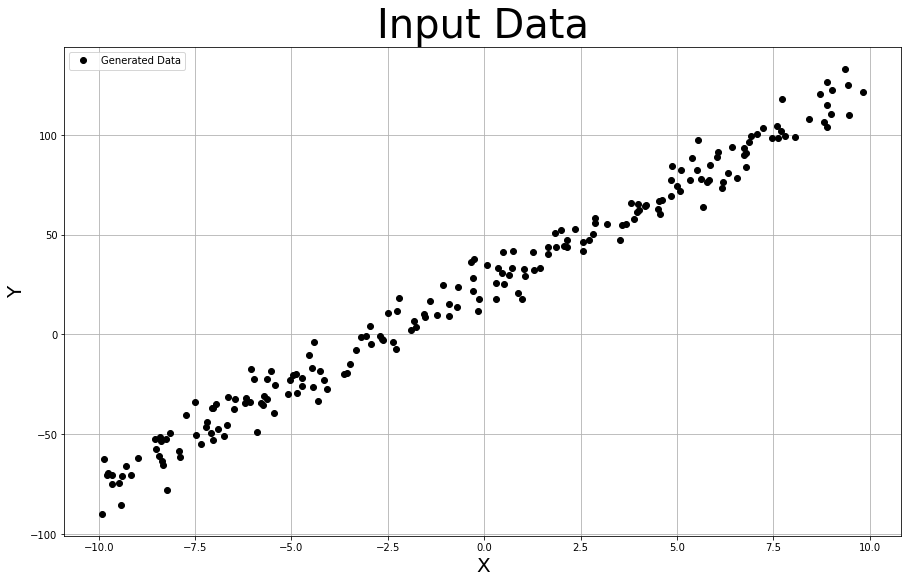

In [43]:
plt.figure(figsize=(15,9))
plt.plot(m_list, y, 'ro', color='black', label='Generated Data')
plt.title('Input Data', fontsize=40)
plt.grid()
plt.legend()
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)

#2. Output Result

Text(0, 0.5, 'Y')

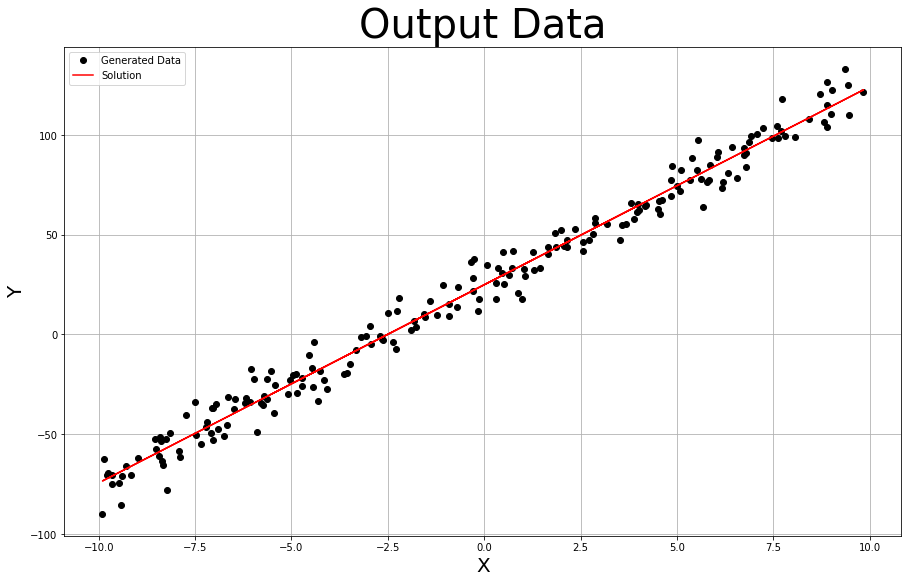

In [44]:
plt.figure(figsize=(15,9))
plt.plot(m_list, y, 'ro', color='black', label='Generated Data')
plt.plot(m_list, h, color='red', label='Solution')
plt.title('Output Data', fontsize=40)
plt.grid()
plt.legend()
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)

#3. Energy Value

Text(0, 0.5, 'Energy Value')

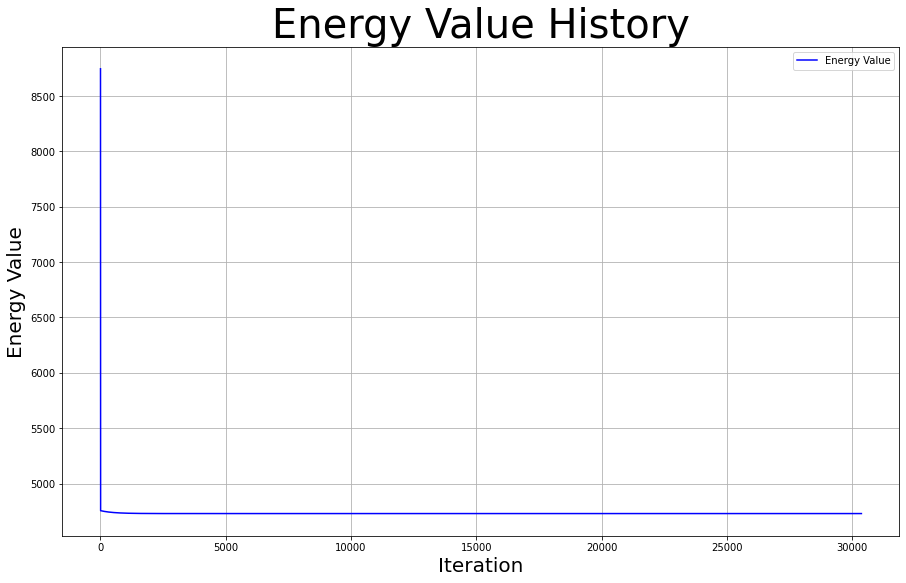

In [0]:
plt.figure(figsize=(15,9))
plt.plot(j_history, color='blue', label='Energy Value')
plt.title('Energy Value History', fontsize=40)
plt.grid()
plt.legend()
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Energy Value', fontsize=20)

#4. Model Parameters

Text(0, 0.5, 'Theta Value')

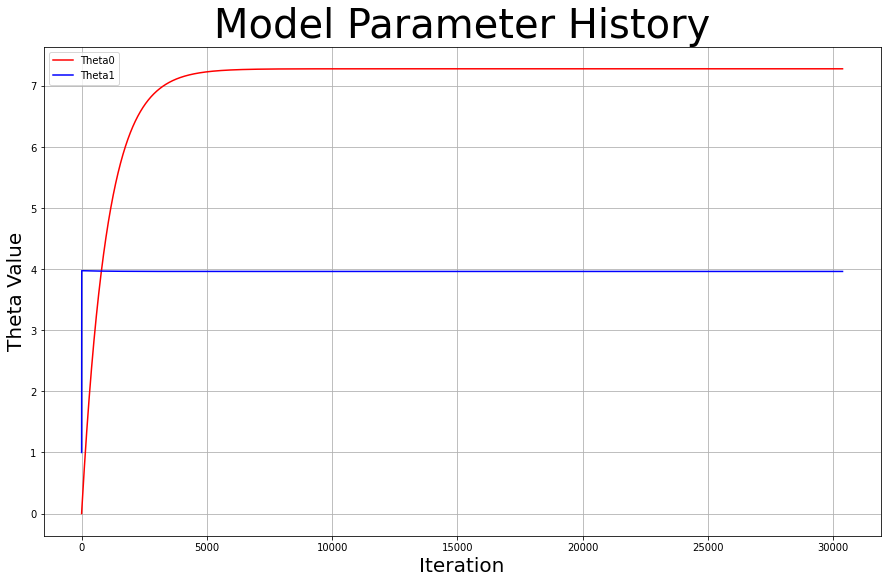

In [0]:
plt.figure(figsize=(15,9))
plt.plot(theta0_history, color='red', label='Theta0')
plt.plot(theta1_history, color='blue', label='Theta1')
plt.title('Model Parameter History', fontsize=40)
plt.grid()
plt.legend()
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Theta Value', fontsize=20)